In [22]:
import pandas as pd

df = pd.read_csv("Urna8_data_file.txt", sep="\t")
df.head()

,Gene,WildType.Sequence,Mutant.Sequence,mRNA.Expression.WT.Rep1,mRNA.Expression.WT.Rep2,mRNA.Expression.WT.Rep3,mRNA.Expression.Mut.Rep1,mRNA.Expression.Mut.Rep2,mRNA.Expression.Mut.Rep3,Protein.Expression.WT.Rep1,...,Protein.Expression.WT.Rep3,Protein.Expression.Mut.Rep1,Protein.Expression.Mut.Rep2,Protein.Expression.Mut.Rep3,CellViability.WT.Rep1,CellViability.WT.Rep2,CellViability.WT.Rep3,CellViability.Mut.Rep1,CellViability.Mut.Rep2,CellViability.Mut.Rep3
0,Urna8,TATGTCTGGCTACGTTGAGAGTTTTGGAGTTGCATCTTCCTTAGTA...,TATGTCTGGCTACGTTGAGAGTTTTGGAGTTGCATCTTCCTTAGTA...,6.135065,5.653703,6.959204,5.955017,6.158652,5.566627,24794,...,26234,24796,45294,26251,0.469279,0.03695,0.822723,0.405501,-0.024948,0.745752


In [24]:
import glob

file_list = glob.glob("*.txt")
df_list = [pd.read_csv(file, sep="\t") for file in file_list]
df = pd.concat(df_list, ignore_index=True)
print(f"Loaded {len(df)} rows from {len(file_list)} files.")
df.head()

Loaded 49 rows from 49 files.


,Gene,WildType.Sequence,Mutant.Sequence,mRNA.Expression.WT.Rep1,mRNA.Expression.WT.Rep2,mRNA.Expression.WT.Rep3,mRNA.Expression.Mut.Rep1,mRNA.Expression.Mut.Rep2,mRNA.Expression.Mut.Rep3,Protein.Expression.WT.Rep1,...,Protein.Expression.WT.Rep3,Protein.Expression.Mut.Rep1,Protein.Expression.Mut.Rep2,Protein.Expression.Mut.Rep3,CellViability.WT.Rep1,CellViability.WT.Rep2,CellViability.WT.Rep3,CellViability.Mut.Rep1,CellViability.Mut.Rep2,CellViability.Mut.Rep3
0,Ah3,TGCCCGTCGTCAGAGGGTGGACGGTTACTATCAACGTCCGCTTCCA...,TGCCCGTCGTCAGAGGGTGGACGGTTACTATCAACGTCCGCTTCCA...,3.183135e+08,26.177081,16.735333,3.183135e+08,27.769621,17.761754,11685.0,...,37123.0,11693.0,26726.0,37133.0,0.261116,0.726898,0.633374,0.338555,0.750318,0.710077
1,Alli2r,TTCTAACATGCGATCCTAGCGAGGGTTGTGTCGGACGTGAGCGGTG...,TTCTAACATGCGATCCTAGCGAGGGTTGTGTCGGACGTGAGCGGTG...,1.095715e+03,2.836341,102.980795,1.096189e+03,1.967358,103.294908,12831.0,...,23695.0,12848.0,28360.0,23705.0,0.638670,0.069546,0.052844,0.626906,0.193052,-0.124587
2,Alli8,TTTACCAGAATCTATAACAGTATATGGCAAAATTCTCCCGCGTACT...,TTTACCAGAATCTATAACAGTATATGGCAAAATTCTCCCGCGTACT...,6.389135e+01,5.165643,13.914518,6.275914e+01,5.012645,13.013207,14317.0,...,42445.0,14334.0,4914.0,42448.0,0.062666,0.090101,0.256835,0.074965,0.163613,0.220555
3,Anap7c1,GGGCGCATAGTAGGCAAGACACCTATTGCTAAAAAACGTCCTGGAC...,GGGCGCATAGTAGGCAAGACACCTATTGCTAAAAAACGTCCTGGAC...,1.629126e+00,20.977798,7.266207,-3.674294e+00,-109.439914,-5.597223,25803.0,...,4047.0,8711.0,21503.0,0.0,0.528095,0.765748,0.273578,0.000000,0.000000,0.000000
4,App1l8,ATCTTATCGTACACTATTAATAAACTAGCGCTGATTCGAGTCGCTC...,ATCTTATCGTACACTATTAATAAACTAGCGCTGATTCGAGTCGCTC...,3.619328e+00,7.207154,1.347365,3.898224e+00,6.585581,0.413255,44784.0,...,3517.0,44785.0,32607.0,3530.0,0.412541,0.059328,0.476712,0.184925,0.017589,0.460078


In [26]:
import difflib

def detect_mutations(wt_seq, mut_seq):
    """Compares wild-type and mutant sequences to identify mutations."""
    mutations = []
    sequence_matcher = difflib.SequenceMatcher(None, wt_seq, mut_seq)

    for tag, i1, i2, j1, j2 in sequence_matcher.get_opcodes():
        if tag == "replace":
            mutations.append(f"Substitution: {wt_seq[i1:i2]} --> {mut_seq[j1:j2]} at {i1}")
        elif tag == "insert":
            mutations.append(f"Insertion: {mut_seq[j1:j2]} at {i1}")
        elif tag == "delete":
            mutations.append(f"Deletion: {wt_seq[i1:i2]} at {i1}")

    return "; ".join(mutations) if mutations else "No mutation"

df ["Mutations"] = df.apply(lambda row: detect_mutations(row["WildType.Sequence"], row["Mutant.Sequence"]), axis=1)

df[["Gene", "Mutations"]].head()

,Gene,Mutations
0,Ah3,Substitution: AACGCATCCTTCCTTACCGGCTAGTGAGCCTA...
1,Alli2r,Substitution: ATGTACTGGTTACGTTAGAGCTTTGCAGGTCT...
2,Alli8,Substitution: AACACCACTAAACCTTAACTGACACATGTAAC...
3,Anap7c1,Substitution: TATATATAGCGTTTCAAAATGTCGAAAGTGCA...
4,App1l8,Substitution: GGGAGTTATGTCCCAAAACCTGGACTCCTCCT...


In [28]:
import numpy as np

expression_cols = ["mRNA.Expression.WT1", "mRNA.Expression.WT2", "mRNA.Expression.WT3", "mRNA.Expression.Mut1", "mRNA.Expression.Mut2", "mRNA.Expression.Mut3", "Protein.Expression.WT1", "Protein.Expression.WT2", "Protein.Expression.WT3", "Protein.Expression.Mut1", "Protein.Expression.Mut2", "Protein.Expression.Mut3", "CellViability.WT1", "CellViability.WT2", "CellViability.WT3", "CellViability.Mut1", "CellViability.Mut2", "CellViability.Mut3"]

df["mRNA_WT_mean"] = df[["mRNA.Expression.WT.Rep1", "mRNA.Expression.WT.Rep2", "mRNA.Expression.WT.Rep3"]].mean(axis=1)
df["mRNA_Mut_mean"] = df[["mRNA.Expression.Mut.Rep1", "mRNA.Expression.Mut.Rep2", "mRNA.Expression.Mut.Rep3"]].mean(axis=1)
df["Protein_WT_mean"] = df[["Protein.Expression.WT.Rep1", "Protein.Expression.WT.Rep2", "Protein.Expression.WT.Rep3"]].mean(axis=1)
df["Protein_Mut_mean"] = df[["Protein.Expression.Mut.Rep1", "Protein.Expression.Mut.Rep2", "Protein.Expression.Mut.Rep3"]].mean(axis=1)
df["Viability_WT_mean"] = df[["CellViability.WT.Rep1", "CellViability.WT.Rep2", "CellViability.WT.Rep3"]].mean(axis=1)
df["Viability_Mut_mean"] = df[["CellViability.Mut.Rep1", "CellViability.Mut.Rep2", "CellViability.Mut.Rep3"]].mean(axis=1)

df["mRNA_WT_std"] = df[["mRNA.Expression.WT.Rep1", "mRNA.Expression.WT.Rep2", "mRNA.Expression.WT.Rep3"]].std(axis=1)
df["mRNA_Mut_std"] = df[["mRNA.Expression.Mut.Rep1", "mRNA.Expression.Mut.Rep2", "mRNA.Expression.Mut.Rep3"]].std(axis=1)
df["Protein_WT_std"] = df[["Protein.Expression.WT.Rep1", "Protein.Expression.WT.Rep2", "Protein.Expression.WT.Rep3"]].std(axis=1)
df["Protein_Mut_std"] = df[["Protein.Expression.Mut.Rep1", "Protein.Expression.Mut.Rep2", "Protein.Expression.Mut.Rep3"]].std(axis=1)
df["Viability_WT_std"] = df[["CellViability.WT.Rep1", "CellViability.WT.Rep2", "CellViability.WT.Rep3"]].std(axis=1)
df["Viability_Mut_std"] = df[["CellViability.Mut.Rep1", "CellViability.Mut.Rep2", "CellViability.Mut.Rep3"]].std(axis=1)

df["mRNA_FoldChange"] = df["mRNA_Mut_mean"] / df["mRNA_WT_mean"]
df["Protein_FoldChange"] = df["Protein_Mut_mean"] / df["Protein_WT_mean"]
df["Viability_FoldChange"] = df["Viability_Mut_mean"] / df["Viability_WT_mean"]

df[["Gene", "mRNA_FoldChange", "Protein_FoldChange", "Viability_FoldChange"]].head(10)

,Gene,mRNA_FoldChange,Protein_FoldChange,Viability_FoldChange
0,Ah3,1.000000,1.000291,1.109512
1,Alli2r,0.999933,1.000509,0.913688
2,Alli8,0.973647,1.000438,1.120925
3,Anap7c1,-3.973853,0.476239,0.000000
4,App1l8,0.895120,1.000321,0.698508
5,App8,1.025606,1.000453,0.821070
6,Avon1a5,1.004830,1.000586,1.093535
7,Avon4,1.575283,1.567175,9.122350
8,Ben3l6,1.000055,1.001150,1.257140
9,Bma9,1.020000,1.000703,0.690506


In [30]:
df["mRNA_FoldChange"].replace(0, 1e-6, inplace=True)
df["Protein_FoldChange"].replace(0, 1e-6, inplace=True)
df["Viability_FoldChange"].replace(0, 1e-6, inplace=True)

df["mRNA_FoldChange"].fillna(1, inplace=True)
df["Protein_FoldChange"].fillna(1, inplace=True)
df["Viability_FoldChange"].fillna(1, inplace=True)

df["mRNA_Log2FC"] = np.log2(df["mRNA_FoldChange"])
df["Protein_Log2FC"] = np.log2(df["Protein_FoldChange"])
df["Viability_Log2FC"] = np.log2(df["Viability_FoldChange"])

fc_threshold = 1
viability_threshold = 0.8

df["Significant_mRNA"] = df["mRNA_Log2FC"].abs() > fc_threshold
df["Significant_Protein"] = df["Protein_Log2FC"].abs() > fc_threshold
df["Significant_Viability"] = df["Viability_Log2FC"].abs() < viability_threshold

df[["Gene", "mRNA_Log2FC", "Significant_mRNA", "Protein_Log2FC", "Significant_Protein", "Viability_Log2FC", "Significant_Viability"]].head(10)

C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Gene,mRNA_Log2FC,Significant_mRNA,Protein_Log2FC,Significant_Protein,Viability_Log2FC,Significant_Viability
0,Ah3,1.472712e-08,False,0.000420,False,0.149925,True
1,Alli2r,-9.629762e-05,False,0.000734,False,-0.130226,True
2,Alli8,-3.852887e-02,False,0.000632,False,0.164690,True
3,Anap7c1,NaN,False,-1.070244,True,-19.931569,False
4,App1l8,-1.598464e-01,False,0.000464,False,-0.517651,True
5,App8,3.647645e-02,False,0.000654,False,-0.284423,True
6,Avon1a5,6.951823e-03,False,0.000845,False,0.128999,True
7,Avon4,6.556113e-01,False,0.648166,False,3.189406,False
8,Ben3l6,7.965199e-05,False,0.001659,False,0.330146,True
9,Bma9,2.856869e-02,False,0.001015,False,-0.534274,True


In [32]:
print(df[["mRNA_FoldChange", "Protein_FoldChange", "Viability_FoldChange"]].isna().sum())

mRNA_FoldChange         0
Protein_FoldChange      0
Viability_FoldChange    0
dtype: int64


In [38]:
df["log_mRNA_Mut"] = np.log10(df["mRNA_Mut_mean"] + 40)
df["log_mRNA_WT"] = np.log10(df["mRNA_WT_mean"] + 1)
df["log_Protein_Mut"] = np.log10(df["Protein_Mut_mean"] + 1)
df["log_Protein_WT"] = np.log10(df["Protein_WT_mean"] + 1)

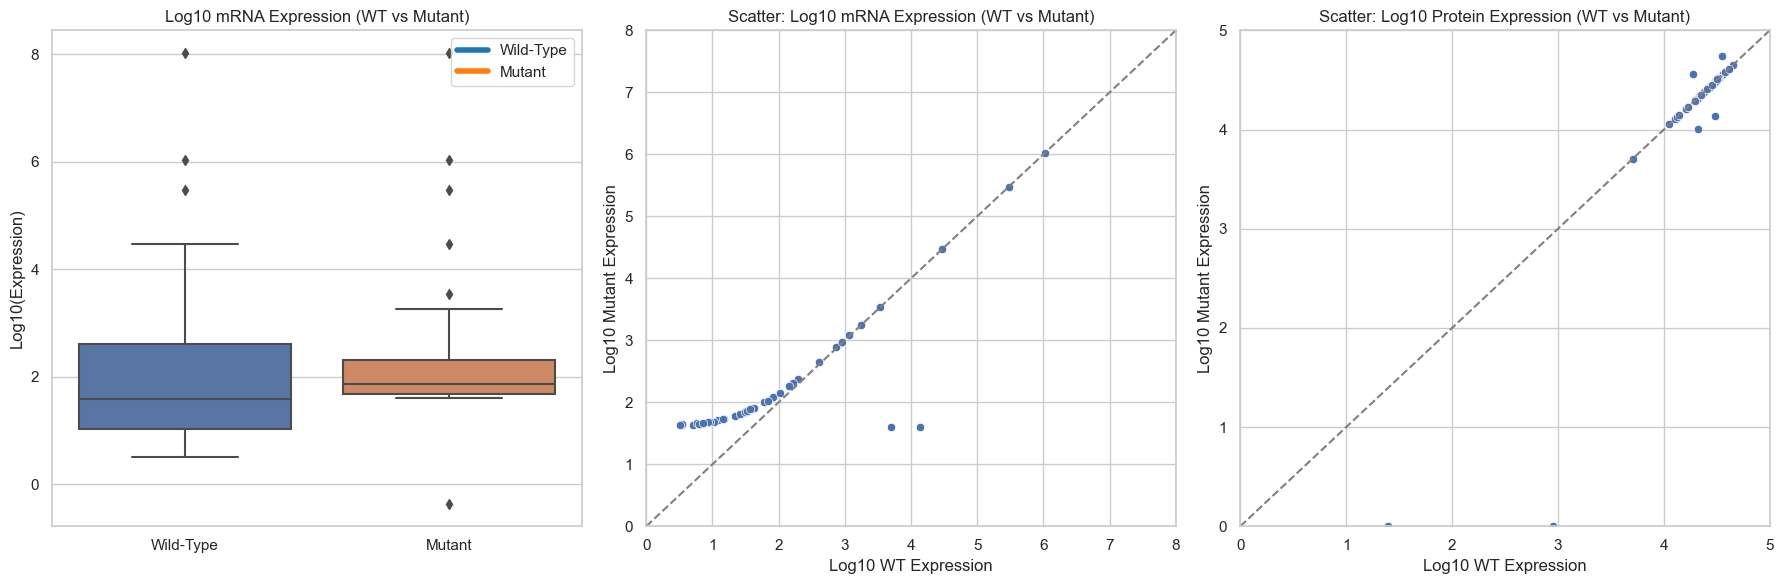

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

log_mRNA_data = pd.DataFrame({
    "Wild-Type": df["log_mRNA_WT"], 
    "Mutant": df["log_mRNA_Mut"]
})

sns.boxplot(data=log_mRNA_data, ax=axes[0])
axes[0].set_title("Log10 mRNA Expression (WT vs Mutant)")
axes[0].set_ylabel("Log10(Expression)")
axes[0].set_xticklabels(["Wild-Type", "Mutant"])

handles = [plt.Line2D([0], [0], color='tab:blue', lw=4, label='Wild-Type'),
           plt.Line2D([0], [0], color='tab:orange', lw=4, label='Mutant')]
axes[0].legend(handles=handles, loc='upper right')

sns.scatterplot(x="log_mRNA_WT", y="log_mRNA_Mut", data=df, ax=axes[1])
axes[1].plot([0, 8], [0, 8], linestyle='--', color='gray')
axes[1].set_title("Scatter: Log10 mRNA Expression (WT vs Mutant)")
axes[1].set_xlabel("Log10 WT Expression")
axes[1].set_ylabel("Log10 Mutant Expression")
axes[1].set_xlim(0, 8)
axes[1].set_ylim(0, 8)

sns.scatterplot(x="log_Protein_WT", y="log_Protein_Mut", data=df, ax=axes[2])
axes[2].plot([0, 5], [0, 5], linestyle='--', color='gray')
axes[2].set_title("Scatter: Log10 Protein Expression (WT vs Mutant)")
axes[2].set_xlabel("Log10 WT Expression")
axes[2].set_ylabel("Log10 Mutant Expression")
axes[2].set_xlim(0, 5)
axes[2].set_ylim(0, 5)

plt.tight_layout()
plt.show()

In [42]:
df["CellViability_WT_mean"]= df[[
    "CellViability.WT.Rep1", "CellViability.WT.Rep2", "CellViability.WT.Rep3"
]].mean(axis=1)

df["CellViability_Mut_mean"]= df[[
    "CellViability.Mut.Rep1", "CellViability.Mut.Rep2", "CellViability.Mut.Rep3"
]].mean(axis=1)

In [44]:
df["CellViability_Change"] = df["CellViability_Mut_mean"] - df["CellViability_WT_mean"]

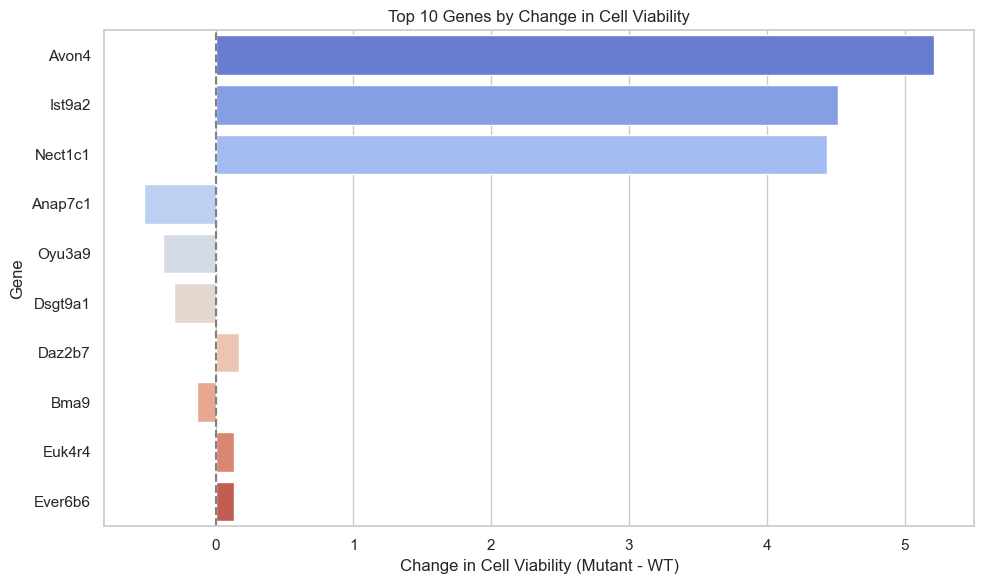

In [46]:
top_changes = df.reindex(df["CellViability_Change"].abs().sort_values(ascending=False).index).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x="CellViability_Change", y="Gene", data=top_changes, palette="coolwarm")

plt.axvline(0, color="gray", linestyle="--")
plt.xlabel("Change in Cell Viability (Mutant - WT)")
plt.ylabel("Gene")
plt.title("Top 10 Genes by Change in Cell Viability")
plt.tight_layout()
plt.show()

In [48]:
def classify_mutation_type(mutation_text):
    if "Insertion" in mutation_text:
        return "Insertion"
    elif "deletion" in mutation_text:
        return "Deletion"
    elif "Substitution" in mutation_text:
        return "Substitution"
    else:
        return "None"

df["MutationType"] = df["Mutations"].apply(classify_mutation_type)

In [50]:
import re 

def classify_mutation_location(mutation_text):
    match = re.search(r'at (\d+)', mutation_text)
    if match: 
        position= int(match.group(1))
        return "Promoter" if position < 1000 else "Coding"
    else:
        return "Unknown"

df["MutationLocation"] = df["Mutations"].apply(classify_mutation_location)

In [52]:
final_df = df.copy()

final_df["mRNA_Change"] = abs(final_df["log_mRNA_Mut"] - final_df["log_mRNA_WT"])
final_df["Protein_Change"] = abs(final_df["log_Protein_Mut"] - final_df["log_Protein_WT"])

final_df["Score"] = (
    final_df["CellViability_Change"].abs() * 2 +
    final_df["mRNA_Change"] + 
    final_df["Protein_Change"]
)

final_df["Score"] += final_df["MutationLocation"].apply(lambda x: 2 if x == "Coding" else 0)

top5_genes = final_df.sort_values("Score", ascending=False).head(5)

top5_genes[[
    "Gene", "MutationType", "MutationLocation",
    "CellViability_Change", "mRNA_Change", "Protein_Change", "Mutations"
]]

,Gene,MutationType,MutationLocation,CellViability_Change,mRNA_Change,Protein_Change,Mutations
26,Ist9a2,Substitution,Promoter,4.514477,2.097896,1.397196,Substitution: TTGTTGATATCTTCGGGAGGGCTAGATGGGAC...
7,Avon4,Substitution,Promoter,5.215711,1.097389,0.195113,Substitution: GCCCACGTATTACTATGTGTTGTTGTGTCGGC...
37,Nect1c1,Substitution,Promoter,4.436899,0.662164,0.346728,Substitution: TATATAATCTTGGTCTGCGCTCCTTTACTGCA...
39,Oyu3a9,Substitution,Promoter,-0.383928,2.538796,2.952985,Substitution: GGTACGAGCTCCGTCCTATGTCGACCGGGAGC...
15,Dsgt9a1,Substitution,Coding,-0.304203,0.322053,0.279115,Substitution: CATAGATGGGTTATGCGAACCGCTCCGGATGC...
